In [1]:
import json
import pandas as pd
from collections import Counter


In [4]:

# Read the JSON file
with open('../stats/predict_stats_lists.json', 'r') as f:
    data = json.load(f)

# Basic information about the data
print(f"Number of test entries: {len(data)}")

# Get summary statistics for each test
for entry in data:
    print("\nTest:", entry['test_name'])
    print(f"Correct predictions: {entry['number of correct prediction']}")
    print(f"Total predictions: {entry['number of total prediction']}")
    print(f"Accuracy: {entry['number of correct prediction'] / entry['number of total prediction']:.2%}")

# Analyze which tasks are most commonly correct/incorrect
all_correct = []
all_incorrect = []

for entry in data:
    all_correct.extend(entry['correct tasks'])
    all_incorrect.extend(entry['not correct tasks'])

# Get most common correct and incorrect tasks
correct_counts = Counter(all_correct)
incorrect_counts = Counter(all_incorrect)

print("\nTop 10 Most Commonly Correct Tasks:")
for task, count in correct_counts.most_common(10):
    print(f"{task}: {count} times")

print("\nTop 10 Most Commonly Incorrect Tasks:")
for task, count in incorrect_counts.most_common(10):
    print(f"{task}: {count} times")

Number of test entries: 6

Test: ttt_output_complete/ttt_output_0/submission.json
Correct predictions: 82
Total predictions: 419
Accuracy: 19.57%

Test: ttt_output_complete/ttt_output_0/submission.json
Correct predictions: 82
Total predictions: 419
Accuracy: 19.57%

Test: ttt_output_complete/ttt_output_10/submission.json
Correct predictions: 96
Total predictions: 419
Accuracy: 22.91%

Test: ttt_output_complete/ttt_output_100/submission.json
Correct predictions: 173
Total predictions: 419
Accuracy: 41.29%

Test: ttt_output_complete/ttt_output_50/submission.json
Correct predictions: 166
Total predictions: 419
Accuracy: 39.62%

Test: ttt_output_complete/ttt_output_50_clone/submission.json
Correct predictions: 178
Total predictions: 419
Accuracy: 42.48%

Top 10 Most Commonly Correct Tasks:
31d5ba1a: 12 times
5d2a5c43: 12 times
b1fc8b8e: 12 times
da2b0fe3: 12 times
e345f17b: 12 times
12997ef3: 9 times
3b4c2228: 9 times
6ea4a07e: 9 times
bbb1b8b6: 9 times
9110e3c5: 7 times

Top 10 Most Commo

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


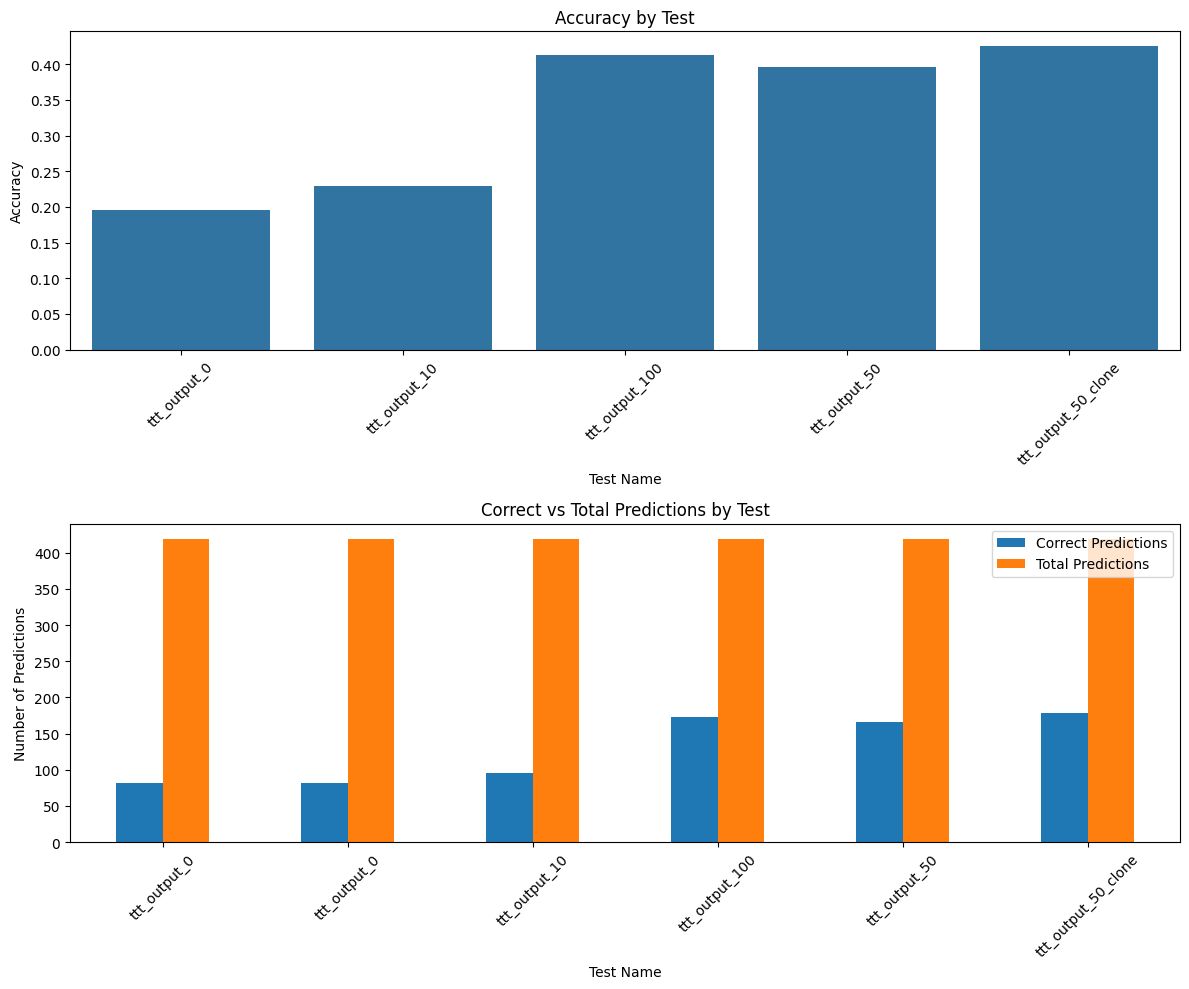


Summary Statistics:
Average accuracy across all tests: 30.91%
Best performing test: ttt_output_50_clone (42.48%)
Worst performing test: ttt_output_0 (19.57%)


In [9]:

# Read the JSON file
with open('../stats/predict_stats_lists.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame with test results
test_results = pd.DataFrame([{
    'test_name': entry['test_name'].split('/')[-2],  # Extract just the test name part
    'correct': entry['number of correct prediction'],
    'total': entry['number of total prediction'],
    'accuracy': entry['number of correct prediction'] / entry['number of total prediction']
} for entry in data])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Bar chart of accuracies
sns.barplot(data=test_results, x='test_name', y='accuracy', ax=ax1)
ax1.set_title('Accuracy by Test')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Test Name')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Correct vs Total predictions
test_results.plot(kind='bar', x='test_name', y=['correct', 'total'], ax=ax2)
ax2.set_title('Correct vs Total Predictions by Test')
ax2.set_ylabel('Number of Predictions')
ax2.set_xlabel('Test Name')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(['Correct Predictions', 'Total Predictions'])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Average accuracy across all tests: {test_results['accuracy'].mean():.2%}")
print(f"Best performing test: {test_results.loc[test_results['accuracy'].idxmax(), 'test_name']} "
      f"({test_results['accuracy'].max():.2%})")
print(f"Worst performing test: {test_results.loc[test_results['accuracy'].idxmin(), 'test_name']} "
      f"({test_results['accuracy'].min():.2%})")

In [ ]:
# read the dataset from arc-prize-2024/arc-hard-tasks.json
with open('../arc-prize-2024/arc-hard-tasks.json', 'r') as f:
    data = json.load(f)

print(f"Number of tasks in the dataset: {len(data)}")